## Weight initialization for Fashion MNIST : PyTorch

In [11]:
import torch
from torch import nn
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import random
import numpy as np
import matplotlib.pyplot as plt

## Step 0. Device Stepup

In [12]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

Hyperparameters

In [13]:
learning_rate = 0.001
batch_size = 100
training_epochs = 30

### Step 1. Data - Fashion MNIST

In [14]:
train_data = datasets.FashionMNIST(root='data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

test_data = datasets.FashionMNIST(root='data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

In [15]:
data_loader = torch.utils.data.DataLoader(dataset=train_data,
                                          batch_size=batch_size)

### Step 2. NN Model

In [16]:
linear1 = nn.Linear(784, 512)
linear2 = nn.Linear(512, 512)
linear3 = nn.Linear(512, 512)
linear4 = nn.Linear(512, 512)
linear5 = nn.Linear(512, 10)
relu = torch.nn.LeakyReLU()

Kaiming initialization

In [17]:
nn.init.kaiming_uniform_(linear1.weight, nonlinearity='leaky_relu')
nn.init.kaiming_uniform_(linear2.weight, nonlinearity='leaky_relu')
nn.init.kaiming_uniform_(linear3.weight, nonlinearity='leaky_relu')
nn.init.kaiming_uniform_(linear4.weight, nonlinearity='leaky_relu')
nn.init.kaiming_uniform_(linear5.weight, nonlinearity='leaky_relu')

Parameter containing:
tensor([[-0.0570,  0.0428, -0.0156,  ...,  0.1022,  0.0463, -0.0193],
        [ 0.0779,  0.0456, -0.0644,  ...,  0.0480, -0.0644,  0.0533],
        [ 0.0314, -0.1033, -0.0708,  ...,  0.0416, -0.1013,  0.0746],
        ...,
        [ 0.0337,  0.0189, -0.1031,  ...,  0.0283, -0.0589, -0.1027],
        [-0.0511, -0.0948, -0.0471,  ..., -0.0560, -0.0328,  0.0646],
        [-0.0185, -0.0124,  0.1035,  ..., -0.0216,  0.0222, -0.0749]],
       requires_grad=True)

In [18]:
model = torch.nn.Sequential(linear1, relu, linear2, relu, linear3, linear4, relu, linear5, relu).to(device)

### Step 3. Loss and Optimizer

In [19]:
criterion = torch.nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### Step 4. Train the model

In [20]:
size = len(data_loader.dataset)
num_batches = len(data_loader)

train_loss = []
train_acc = []
for epoch in range(training_epochs):

    cost, correct = 0, 0
    for X, Y in data_loader:

        X = X.view(-1, 28 * 28).to(device)
        Y = Y.to(device)
   
        pred_y = model(X)
        loss = criterion(pred_y, Y)
        cost += loss.item()
        correct += (pred_y.argmax(1) == Y).type(torch.float).sum().item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    cost /= num_batches
    correct /= size
    train_loss.append(cost)
    train_acc.append(correct)

    print(f"Epochs: {epoch:>d}, Avg loss: {cost:>8f},  Accuracy: {(100*correct):>0.1f}%")
 
print('Done !')

Epochs: 0, Avg loss: 0.837991,  Accuracy: 70.9%
Epochs: 1, Avg loss: 0.366354,  Accuracy: 86.5%
Epochs: 2, Avg loss: 0.325273,  Accuracy: 88.0%
Epochs: 3, Avg loss: 0.301910,  Accuracy: 88.7%
Epochs: 4, Avg loss: 0.281216,  Accuracy: 89.4%
Epochs: 5, Avg loss: 0.268706,  Accuracy: 89.8%
Epochs: 6, Avg loss: 0.256135,  Accuracy: 90.3%
Epochs: 7, Avg loss: 0.244198,  Accuracy: 90.7%
Epochs: 8, Avg loss: 0.233898,  Accuracy: 91.1%
Epochs: 9, Avg loss: 0.226364,  Accuracy: 91.3%
Epochs: 10, Avg loss: 0.219094,  Accuracy: 91.6%
Epochs: 11, Avg loss: 0.211521,  Accuracy: 91.9%
Epochs: 12, Avg loss: 0.209408,  Accuracy: 92.0%
Epochs: 13, Avg loss: 0.200063,  Accuracy: 92.3%
Epochs: 14, Avg loss: 0.195851,  Accuracy: 92.4%
Epochs: 15, Avg loss: 0.187464,  Accuracy: 92.7%
Epochs: 16, Avg loss: 0.188910,  Accuracy: 92.8%
Epochs: 17, Avg loss: 0.177576,  Accuracy: 93.2%
Epochs: 18, Avg loss: 0.173008,  Accuracy: 93.2%
Epochs: 19, Avg loss: 0.171588,  Accuracy: 93.4%
Done !


#### Display the training results

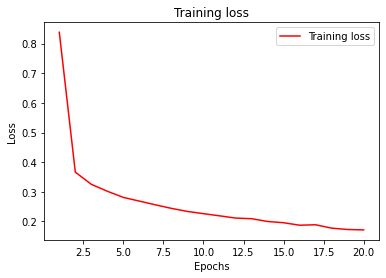

In [21]:
epochs = np.arange(1, training_epochs+1)
plt.plot(epochs, train_loss, 'r', label='Training loss')
plt.title('Training loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

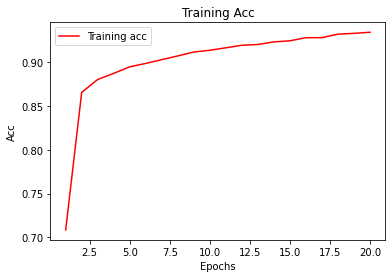

In [22]:
plt.clf()   # 그래프를 초기화합니다
plt.plot(epochs, train_acc, 'r', label='Training acc')
plt.title('Training Acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.show()

### Step 5. Test

In [23]:
with torch.no_grad():
    X_test = test_data.data.view(-1, 28 * 28).float().to(device)
    Y_test = test_data.targets.to(device)

    prediction = model(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Test Accuracy :', accuracy.item())

Test Accuracy : 0.843500018119812
